# Problem Set 1 - KNN
## CSCI 5622 - Spring 2020

For today's assignment, we will be implementing our own K-Nearest Neighbors (KNN) algorithm.

*But Professor Quigley, hasn't someone else already written KNN before?*

Yes, you are not the first to implement KNN, or basically any algorithm we'll work with in this class. But 1) I'll know that you know what's really going on, and 2) you'll know you can do it, because 2a) someday you might have to implement some machine learning algorithm from scratch - maybe for a new platform (do you need to run python on your SmartToaster just to get it to learn how users like their toast?), maybe because you want to tweak the algorithm (there's always a better approach...), or maybe because you're working on something important and you need to control exactly what's on there (should you really be running anaconda on your secret spy plane?).

That said - we're not going to implement *everything*. We'll start by importing a few helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

*Wait a minute - didn't we just import Scikit-learn (sklearn)? The package with baked-in machine learning tools?*

Yes - but it also has a ton of helper functions, including a dataset we'll be using later. But, for now, let's set up a KNNClassifier class.

In [2]:
import sklearn.neighbors

class KNNClassifier:
    
    def __init__(self, X, y, k = 5):
        """
        Initialize our custom KNN classifier
        PARAMETERS
        X - our training data features
        y - our training data answers
        k - the number of nearest neighbors to consider for classification
        """
        self._model = sklearn.neighbors.BallTree(X)
        self._y = y
        self._k = k
        self._counts = self.getCounts()
    
    def createClassMap(self):
        """
        Creates a unqiue mapping for each class in self._y, and an integer
        Returns a dictionary where the Keys are our unique integer mapping, and the values are the corresponding classes
        """
        classes = [] #array that will contain all of the unique classes
        for i in np.nditer(self._y):
            #looks for classes that we have not already found
            if i not in classes:
                #put the new class into our growing list of classes
                #We know all of the classes will be integers, so we force the type to be an int, as this will
                #be important for finding the majority label
                classes.append(i)
        #This sorting will make our matrix into a consistant easily interpretable order
        #The sorting eliminates the interpretation's dependence on the order classes are encountered in the above
        #For loop
        classes.sort()
        #The next two lines just get classes into the correct data type
        classes = np.array([classes])
        classes = list(classes[0])
        mapping = []
        #if our classes are not integers we would like to map them for indexing purposes
        for i in range(0,len(classes)):
            mapping.append(i)
        #use this unique mapping to make a dictionary for easy lookup
        myMap = dict(zip(mapping, classes))
        return(myMap)
        
    def getCounts(self):
        """
        Creates a dictionary storing the counts of each answer class found in y
        RETURNS
        counts - a dictionary of counts of answer classes
        """
        counts = dict({1:0,-1:0})
        #BEGIN Workspace 1.1
        #TODO: Modify and/or add to counts so that it returns a count of each answer class found in y
        #END Workspace 1.1
        
        #create an integer mapping of all of the classes in self._y
        myMap = self.createClassMap()
        
        #Get the map values and keys for indexing purposes, and to keep the map consistant
        mapValues = list(myMap.values())
        mapKeys = list(myMap.keys())
        #Initialize an array to keep track of the counts. Each index will correspond to the a key in myMap
        countsVals = np.zeros(len(mapValues))
        #Iterate through our the subset of our y training data that we are interested in and count each class that 
        #appears
        for i in np.nditer(self._y):
            countsVals[mapKeys[mapValues.index(i)]] = countsVals[mapKeys[mapValues.index(i)]]+1
        #Make a dictionary that has each classes' counts
        counts = dict(zip(mapValues, countsVals.tolist()))   
        return(counts)
    
    def majority(self, indices):
        """
        Given indices, report the majority label of those points.
        For a tie, report the most common label in the data set.
        PARAMETERS
        indices - an np.array, where each element is an index of a neighbor
        RETURNS
        label - the majority label of our neighbors
        """
        label = 0
        #BEGIN Workspace 1.2
        #TODO: Determine majority, assign it to label
        
        #create an integer map of all of the classes in our problem space
        myMap = self.createClassMap()
        
        #-------------------
        
        mapValues = list(myMap.values())
        mapKeys = list(myMap.keys())
        #Initialize an array to keep track of all of our counts for each of the classes we found in train_y[indices]
        counts = np.zeros(len(mapValues))
        #Iterate through our the subset of our y training data that we are interested in and count each class that 
        #appears
        for i in np.nditer(self._y[0][indices]):
            counts[mapKeys[mapValues.index(i)]] = counts[mapKeys[mapValues.index(i)]]+1 
        #Make a dictionary that has each classes' counts
        dictOfClassCounts = dict(zip(mapKeys, counts.tolist()))
        
        #find the max frequency of a class that appears in our subset of indices, and break ties:
        
        #make a list of the values that our dictionary contains
        vals = list(dictOfClassCounts.values())
        #specify a list of the keys in our dictionary of counts
        keys = list(dictOfClassCounts.keys())
        #find the maximum value in the dictionary
        maximum = max(vals)
        #Initialize an array to keep track of any ties
        maxCounts = []
        #iterate through our dictionary
        for i in range(0,len(vals)):
            #if position i is a maximum value of our dictionary keep track of that class in maxCounts
            if vals[i] == maximum:
                maxCounts.append(mapValues[mapKeys.index(keys[i])])
        #if we had more than 1 max, return the most prevalent value in our data set:
        if len(maxCounts) > 1:
            #find what classes had ties
            temp = self._y[0][list(indices)[0]]
            mapValsOfInterest = []
            #use our mapping to find what integer values each tied class corresponds to
            #put these in mapValsOfInterest
            for i in temp:
                mapValsOfInterest.append(mapKeys[mapValues.index(i)])
            
            #----
            
            #create a list of counts that correspond to our tied classes
            overallVals = [list(self._counts.values())[i] for i in mapValsOfInterest]
            #create a list of classes that we are interested in
            overallKeys = [list(self._counts.keys())[i] for i in mapValsOfInterest]
            #find the count of the most frequent class of our subset
            maxim = max(overallVals)
            #find the class of the most common label
            label = overallKeys[overallVals.index(maxim)]
        else:
            label = maxCounts[0]
        #END Workspace 1.2
        return(label)
    
    def classify(self, point):
        """
        Given a new data point, classify it according to the training data X and our number of neighbors k into 
        the appropriate class in our training answers y
        PARAMETERS
        point - a feature vector of our test point
        RETURNS
        ans - our predicted classification
        """
        ans = 0
        #BEGIN Workspace 1.3
        #TODO: perform classification of point here
        #HINT: use the majority function created above
        #HINT: use the euclidian distance discussed in lecture to find nearest neighbors
        #Turn point into a row vector, needed for python to understand how to query the ball tree
        point = point.reshape(1,-1)
        distances, indices = self._model.query(point, k=self._k) 
        ans = self.majority(indices)
        #END Workspace 1.3

        return(ans)
    
    def confusionMatrix(self, testX, testY):
        """
        Generate a confusion matrix for the given test set
        PARAMETERS
        testX - an np.array of feature vectors of test points
        testY - the corresponding correct classifications of our test set
        RETURN
        C - an N*N np.array of counts, where N is the number of classes in our classifier
        """
        #C = np.array()
        #BEGIN Workspace 1.4
        #TODO: Run classification for the test set, compare to test answers, and add counts to matrix
        #Classify test set:
        #Initialize our array of predicted Ys
        predY = []
        #For each set of observations append our model's predicted classification to predY
        for i in testX:
            predY.append(self.classify(i))
        #Now, find confusion matrix
        
        #make a list of all the classes in our problem space
        classes = list(self.createClassMap().values())
        #----------
        
        C = np.zeros((len(classes), len(classes))) #Initialize our confusion matrix with all zeros
        #k will keep track of where we are in the predY list as we iterate over testY to create our matrix
        k = 0
        #Look at the real identity of the testY's
        for i in np.nditer(testY):
            i = np.array([i])
            i = list(i)
            i = i[0]
            #if the two classes are the same we will increase
            C[classes.index(i), classes.index(predY[k])] += 1
            k+=1

        #END Workspace 1.4
        
        return(C)
    
    def accuracy(self, C):
        """
        Generate an accuracy score for the classifier based on the confusion matrix
        PARAMETERS
        C - an np.array of counts
        RETURN
        score - an accuracy score
        """
        score = np.sum(C.diagonal()) / C.sum()
        return(score)

*But professor, this code isn't complete!*

### Problem 1: Complete our KNN Classifier - 40 Points (10 each)

1.1 - Complete the getCounts function to return the count of each class found in the training set

1.2 - Complete the majority function to determine the majority class of a series of neighbors

1.3 - Complete the classify function to capture the predicted class of a new datapoint

 - HINT: Use the BallTree documentation to determine how to retrieve neighbors from the model (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree)

1.4 - Complete the confusionMatrix function to reveal the results of classification

You can take a look at the unit tests below to see how we create data to input into our classifier, what kinds of things we expect as output, etc. You should also consider expanding the test cases to make sure your classifier is working correctly.


In [3]:
import unittest
class KNNTester(unittest.TestCase):
    def setUp(self):
        self.x = np.array([[3,1],[2,8], [2,7], [5,2],[3,2],[8,2],[2,4]])
        self.y = np.array([[1, -1, -1, 1, -1, 1, -1]])
        self.knnfive = KNNClassifier(self.x, self.y)
        self.knnthree = KNNClassifier(self.x, self.y, 3)
        self.knnone = KNNClassifier(self.x, self.y, 1)
        
        self.testPoints = np.array([[2,1], [2,6], [4, 4]])
        
    def testCounter(self):
        """
        Test getCounts function from knnclassifier
        """
        self.assertEqual(self.knnfive._counts[1], 3)
        self.assertEqual(self.knnfive._counts[-1], 4)
        
    def testKNNOne(self):
        """
        Test if the classifier returns "correct" (expected) classifications for k = 1
        """
        self.assertEqual(self.knnone.classify(self.testPoints[0]), 1)
        #BEGIN Workspace
        self.assertEqual(self.knnfive.classify(self.testPoints[1]), -1)
        #END Workspace
    
    #BEGIN Workspace
    #Add more test functions as desired
    #HINT - You'll want to make sure each of your functions from the KNNClassifier class you created work correctly...
    #Used this method to test my confusion matrix, but I was worried it would mess with the autograder
    """
    def testConfusionMatrix(self):
        answer = np.matrix([[4,0],[0,3]])
        print("Confusion Matrix test, picked K = 1, and used the test sets as the training (should have 100% accuracy)"),
        print(np.array_equal(self.knnone.confusionMatrix(self.x, self.y), answer))
        C = self.knnone.confusionMatrix(self.x, self.y)
        print("Accuracy: "), print(self.knnone.accuracy(C))
        answer = np.matrix([[0,3],[4,0]])
        print("------------------------------")
        C =self.knnone.confusionMatrix(self.x, -1*self.y)
        print("Confusion matrix test case for 0% accuracy (prints true if passed):")
        print(np.array_equal(self.knnone.confusionMatrix(self.x, -1*self.y), answer))
        C = self.knnone.confusionMatrix(self.x, -1*self.y)
        print("Accuracy: "), print(self.knnone.accuracy(C))
        print("------------------------------")
        print("Confusion matrix test case for more than 2 classes:")
        altY = np.array([[1, -1, -1, 1, -1, 1, -1]])
        altY[0][1] = 4
        knnoneMultClass = KNNClassifier(self.x, altY)
        C = knnoneMultClass.confusionMatrix(self.x, altY)
        print("This is just a proof that it would work with another class, we have not adjusted the other")
        print("parts of the code to deal with more classes")
        print(C)
    """
    def testEqualNumberOfNeighbors(self):
        tempX = np.array([[2,1],[2,1], [2,8], [5,2],[3,2],[8,2],[2,4]])
        knnTwo = KNNClassifier(tempX, self.y, 2)
        self.assertEqual(knnTwo.classify(self.testPoints[0]), -1)
        tempY = np.array([[1, -1, 3, 3, 3, 3, 1]])
        knnTwo = KNNClassifier(tempX, tempY, 2)
        self.assertEqual(knnTwo.classify(self.testPoints[0]), 1)
    def testStringClasses(self):
        tempX = np.array([[3,1],[2,8], [2,7], [5,2],[2,1],[2,1],[2,1]])
        tempY = np.array([["a", "b", "b", "b", "c", "c", "c"]])
        knnString = KNNClassifier(tempX, tempY, 3)
        self.assertEqual(knnString.classify(self.testPoints[0]), "c")
        
        
                            
    #END Workspace
    
tests = KNNTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)

....
----------------------------------------------------------------------
Ran 4 tests in 0.020s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

OK - now we've demonstrated that our KNN classifier works, let's think about our problem space! 

## Our Dataset - Identifying Digits from Images

It's a pretty common problem - just imagine working at the post office, or at a bank, and you're handed a hand-written envelope, or check, or other piece of information and you have to identify exactly what it says. Did they pay 500 or 600 dollars? Is the letter going to 80309 (campus) or 30309 (Atlanta)?

Let's be a little smart about this - let's up some classes and helper functions to help us out.

### Problem 2: Implement KNN on Digits dataset - 30 Points

2.1 Randomly divide our Digits dataset into training and testing sets (15 Points)

2.2 Report the number of examples in training and testing, as well as measuring then number of pixels in each image (5 points)

2.3 Create a confusion matrix of our classifier for K = 5 (10 points) *HINT: Doing this may cause you to catch mistakes in your classifier. Go fix those!*

In [4]:

class Numbers:
    def __init__(self):
        #load data from sklearn
        digits = sklearn.datasets.load_digits()
        
        #BEGIN Workspace 2.1
        #TODO: Divide our dataset into Train and Test datasets (80/20 split), replacing the variables above
        #Set n for convience as the number of observations
        n = len(digits.data)
        #Choose 80% of the values from a list [0, n-1] without replacement to get a random subset of indices which
        #will comprise our training data
        trainIndices = np.random.choice(n, int(np.ceil(.8*n)), replace = False)
        
        #Choose only the randomly selected 80% of the data to be our training indices (data contains the features
        #and target contains their corresponding known digit (the target))
        self.train_x = np.array(digits.data[trainIndices]) # A 2D np.array of training examples
        self.train_y = np.array([digits.target[trainIndices]]) # A 1D np.array of training answers
        
        #To get the 20% of the data that is not for training we first make an array of size n of all Trues
        testIndices = np.ones(n, dtype = bool)
        #After this we select all of the training indices to be false, so only testing indices will be True
        testIndices[trainIndices] = False
        
        #Plugging this in to digits.data and digits.target will give only the observations that are not in our
        #training set
        self.test_x = np.array(digits.data[testIndices]) # A 2D np.array of testing examples
        self.test_y = np.array([digits.target[testIndices]]) # A 1D np.array of testing answers 
        #END Workspace 2.1
        
    def report(self):
        """
        Report information about the dataset using the print() function
        """
        #BEGIN Workspace 2.2
        #TODO: Create printouts for reporting the size of each set and the size of each datapoint
        print("The number of examples in the training dataset is:")
        print(len(self.train_x))
        print("The number of examples in the testing dataset is:")
        print(len(self.test_x))
        print("The number of pixels in each image is:")
        print(len(self.test_x[0]))
        #END Workspace 2.2
        
    def classify(self):
        """
        Create a classifier using the training data and generate a confusion matrix for the test data
        """
        #BEGIN Workspace 2.3
        #TODO: Create classifier from training data, generate confusion matrix for test data
        predY = []
        label = 0
        K = 5
        knnK = KNNClassifier(self.train_x, self.train_y, K)
        for point in self.test_x: 
            #Turn point into a row vector, needed for python to understand how to query the ball tree
            label = knnK.classify(point)
            predY.append(np.round(label))
        #Make confusion matrix
        C = knnK.confusionMatrix(self.test_x, self.test_y)
        #END Workspace 1.4
        print("Confusion Matrix:")
        print(C)
        print("Accuracy:")
        print(np.sum(C.diagonal()) / C.sum())
        return(predY)
        #END Workspace 2.3
    def findMisclassified(self, predY):
        """
        Returns the indices of missclassified elements
        """
        indices = []
        for i in range(0, len(predY)):
            if predY[i] != self.test_y[0][i]:
                indices.append(i)
        return(indices)
    
    def getTestSet(self):
        return(self.test_y, self.test_x)
    
    def viewDigit(self, digitImage):
        """
        Display an image of a digit
        PARAMETERS
        digitImage - a data object from the dataset
        """
        plt.gray()
        plt.matshow(digitImage)
        plt.show()
        

*Wow, I can't believe we just created a KNN Classifier - but can't we make it better?*

Yes, we saw above that our classifier didn't work perfectly. Let's explore that issue a little further

### Problem 3: Improving KNN on Digits - 30 Points

3.1 Determine which classes are most often confused (from our confusion matrix above), inspect some examples of these digits (using the viewDigit function in our Numbers class), and write a brief (4 - 5 sentences) description of why you think these particular numbers may be misclassified.

3.2 Explore the influence of the number of nearest neighbors (i.e. try changing our K). Plot the relationship between K and accuracy, and write a brief (4 - 5 sentences) description of how this factor impacts our accuracy.

3.3 (Bonus) Explore the influence of the train / test split of our data (i.e. copy our Numbers class into Numbers2 below and try changing the split for our dataset). Plot the relationship between the split % and accuracy, and write a brief (4 - 5 sentences) description of its impact.

Confusion Matrix:
[[28.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 39.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 33.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 30.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 43.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0. 39.  1.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0. 39.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 38.  0.  0.]
 [ 0.  2.  0.  1.  0.  0.  0.  0. 27.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 37.]]
Accuracy:
0.9832869080779945


<Figure size 432x288 with 0 Axes>

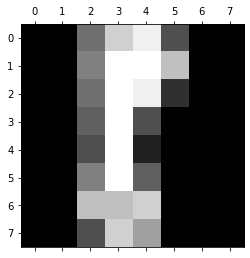

For the above digit we predicted: 
1
When the actual digit was: 
8


<Figure size 432x288 with 0 Axes>

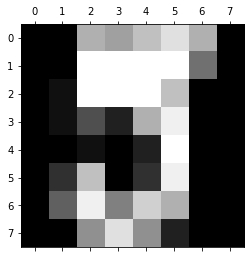

For the above digit we predicted: 
9
When the actual digit was: 
5


<Figure size 432x288 with 0 Axes>

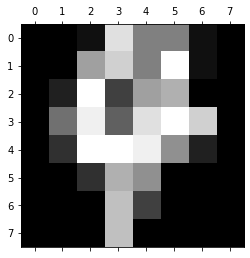

For the above digit we predicted: 
7
When the actual digit was: 
4


<Figure size 432x288 with 0 Axes>

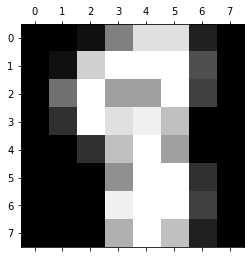

For the above digit we predicted: 
1
When the actual digit was: 
8


<Figure size 432x288 with 0 Axes>

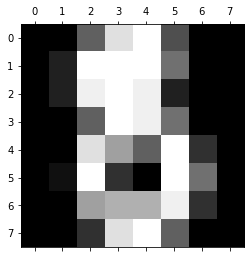

For the above digit we predicted: 
3
When the actual digit was: 
8


<Figure size 432x288 with 0 Axes>

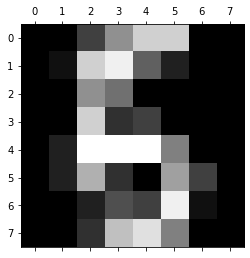

For the above digit we predicted: 
6
When the actual digit was: 
5


In [5]:
#BEGIN 3.1a
#TODO: Print out problem class images
testInstance = Numbers()
digits, data = testInstance.getTestSet()
predY = testInstance.classify()
misclassified = testInstance.findMisclassified(predY)
k=0
for i in misclassified:
    testInstance.viewDigit(data[i].reshape(8,8))
    print("For the above digit we predicted: "), print(predY[i]), 
    print("When the actual digit was: "), print(digits[0][i])
#END 3.1a

#### 3.1b
The primary motif of the misclassified images are that they share many aspects to other letters in the set. take 9 and 3 for example, as these seem to be frequently misclassified by our algorithm. A 9 is basically a 3 with the top two loops of the 3 being closed, but there is very little difference between them otherwise. This means that our classifier must be senstive to only a couple of pixels in order to make this distinction as most of the structure will be largely the same. This is sometimes a hard choice to make, especially when we are simply finding which members of the data set are close to one another. This can be said about all of our misclassifications, especially when the algorithm mixes up an 8 for a 6 or vise versa, again a 6 is just an 8 with the top loop opened so our algorithm must be incredibly precise at picking just a few pixels of difference to notice the distinction in some cases.

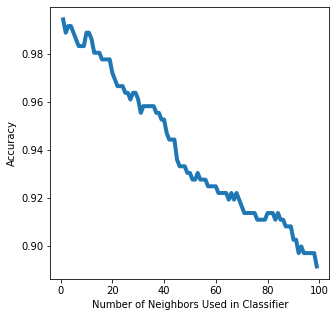

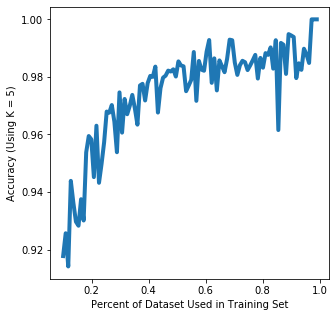

In [6]:
class Numbers2:
    def __init__(self, trainPercentage):
        #load data from sklearn
        digits = sklearn.datasets.load_digits()
        
        #BEGIN Workspace 3.3a
        #TODO: Divide our dataset into Train and Test datasets (using trainPercentage), replacing the variables above
        #HINT: You should be able to mostly copy your own work from the original Numbers class
        #Set n for convience as the number of observations
        n = len(digits.data)
        #Choose trainPercentage of the values from a list [0, n-1] without replacement to get a random subset of indices which
        #will comprise our training data
        trainIndices = np.random.choice(n, int(np.ceil(trainPercentage*n)), replace = False)
        
        #Choose only the randomly selected 80% of the data to be our training indices (data contains the features
        #and target contains their corresponding known digit (the target))
        self.train_x = np.array(digits.data[trainIndices]) # A 2D np.array of training examples
        self.train_y = np.array([digits.target[trainIndices]]) # A 1D np.array of training answers
        self.ballTree_x = sklearn.neighbors.BallTree(self.train_x)
        
        #To get the 20% of the data that is not for training we first make an array of size n of all Trues
        testIndices = np.ones(n, dtype = bool)
        #After this we select all of the training indices to be false, so only testing indices will be True
        testIndices[trainIndices] = False
        
        #Plugging this in to digits.data and digits.target will give only the observations that are not in our
        #training set
        self.test_x = np.array(digits.data[testIndices]) # A 2D np.array of testing examples
        self.test_y = np.array([digits.target[testIndices]]) # A 1D np.array of testing answers 
        #END Workspace 3.3a
    
    def classify(self, k):
        """
        Create a classifier using the training data and generate a confusion matrix for the test data
        """
        #BEGIN Workspace 3.2a
        #TODO: Create classifier from training data (using k nearest neighbors), generate confusion matrix for test data
        #HINT: You can copy your own work from the original Numbers class
        predY = []
        label = 0
        K = 5
        knnK = KNNClassifier(self.train_x, self.train_y, k)
        for point in self.test_x: 
            #Turn point into a row vector, needed for python to understand how to query the ball tree
            label = knnK.classify(point)
            predY.append(np.round(label))
        #Make confusion matrix
        C = knnK.confusionMatrix(self.test_x, self.test_y)
        return(np.sum(C.diagonal()) / C.sum())
        #END Workspace 3.2a
        
    def viewDigit(digitImage):
        """
        Display an image of a digit
        PARAMETERS
        digitImage - a data object from the dataset
        """
        plt.gray()
        plt.matshow(digitImage)
        plt.show()

classifier = Numbers2(.8)
kClassificationAcc = []
#for loop will run k-nearest neighbors on each value of k from 1 to 99
for i in range(1,100):
    kClassificationAcc.append(classifier.classify(i))
#plot the accuracy vs the number of neighbors used in the classifier
kvec = np.linspace(1,99,99)
fig = plt.figure(figsize=(5,5))  # initialize figure with a given area in inches
plt.plot(kvec, kClassificationAcc,linewidth=4.0)
plt.xlabel('Number of Neighbors Used in Classifier')
plt.ylabel('Accuracy')
plt.show()

#Create linearly spaced points from .1 to .99
splitvec = np.linspace(.1,.99, 100)
kClassificationAcc = []
for i in np.nditer(splitvec):
    classifier = Numbers2(i)
    kClassificationAcc.append(classifier.classify(5))
#plot the points using splits from .1 to .99% of the data used
fig = plt.figure(figsize=(5,5))  # initialize figure with a given area in inches
plt.plot(splitvec, kClassificationAcc,linewidth=4.0)
plt.xlabel('Percent of Dataset Used in Training Set')
plt.ylabel('Accuracy (Using K = 5)')
plt.show()

#### 3.2b
The number of neighbors K that are used in our classifier appear to have a negative impact on the accuracy of our predictor when applied to the test set. This is because when using too many we are underfitting our model to the data set. Consider the case where K = the number of observations in the training set. This would mean that we would simply classify all novel points as the most common class in our training set, basically nullifying the entire point of applying an algorithm to make predictions. As we increase K we get closer and closer to making this mistake, which is why the accuracy is falling: because we are using points that are nowhere near our novel data points.

#### 3.3b
It appears that, in general, using more of the data set as training data improves accuracy on the test set, though only to a point. We can note that as we approach 1 (using the whole data set as the training data) we are getting a lot more variability in the accuracy when applying our algorithm to the test set. This could be because using more data is actually overfitting our model, or it could be because as our test set gets smaller the variance will increase simply because there are too few points to get a statistically accurate idea of how our model is preforming. Whatever the case, it appears that there is a 'sweet spot' in accuracy of our model and consistantly being able to validate said model that occurs around 80% of the data used as training data. This leaves us with enough data in the test set to validate our model, while still giving us close to the maximum accuracy that our model is capable of.